# Future Sales Prediction

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product. There are many more benefits of predicting the future sales of a product.
The dataset here contains the data about the sales of the product. It is about the advertising cost incurred by the business on various advertising platforms.




Below is the description of all the columns in the dataset:
- TV: Advertising cost spent in dollars for advertising on TV;
- Radio: Advertising cost spent in dollars for advertising on Radio;
- Newspaper: Advertising cost spent in dollars for advertising on Newspaper;
- Sales: Number of units sold;

# EDA

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/advertising/main/advertising.csv")

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
df.shape

(200, 4)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* there is no null value in dataset

In [97]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


<AxesSubplot:>

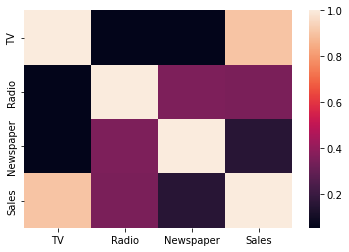

In [100]:
sns.heatmap(df.corr())

* 'Sales' column has highest correlation with 'TV', then 'Radio' and at last 'Newspaper'

# visualization

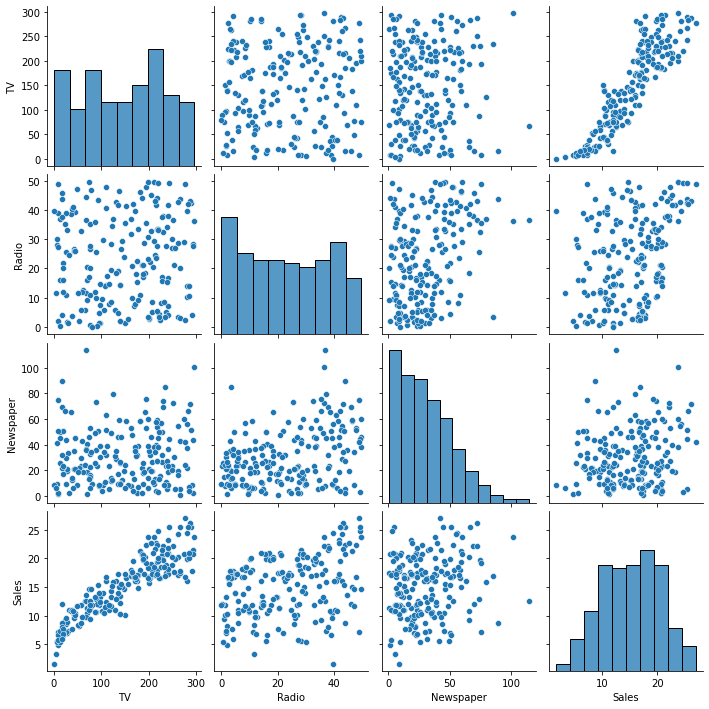

In [34]:
sns.pairplot(df)

In [39]:
fig = px.scatter(data_frame=df, x='Newspaper', y='Sales', size='Newspaper',trendline='ols')
fig.show()

In [40]:
figure = px.scatter(data_frame = df, x="Radio", y="Sales", size="Radio", trendline="ols")
figure.show()

In [42]:
figure = px.scatter(data_frame=df, x='TV', y='Sales', trendline='ols', size='TV')
figure.show()

* there is a linear relationship between features and target so we use LinearRegression model

# Model Development

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df[['Sales']]

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.3)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg = LinearRegression()

In [78]:
reg.fit(X_train, Y_train)

LinearRegression()

In [79]:
pred = reg.predict(X_test)

# Evaluation 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:ylabel='Density'>

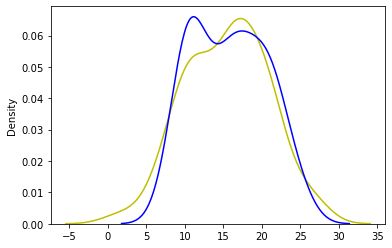

In [80]:
ax1 = sns.distplot(Y_test, hist=False, color='y')
sns.distplot(pred, hist=False, color='b', ax=ax1)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
print("EVALIUATION")
print('the MSE is: ', mean_squared_error(Y_test, pred))
print('the MAE is: ', mean_absolute_error(Y_test, pred))
print('the R2 is: ', r2_score(Y_test, pred))

EVALIUATION
the MSE is:  3.800868305591719
the MAE is:  1.4492775396357909
the R2 is:  0.8651167784377882


# intercept and slope

In [84]:
reg.intercept_

array([4.8494583])

In [85]:
reg.coef_

array([[ 0.05336672,  0.11626114, -0.00583884]])